In [3]:
%pip install datasets
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
ds = load_dataset("Elfsong/Venus_t")

train-00000-of-00002.parquet:  29%|##9       | 21.0M/71.7M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/177M [00:00<?, ?B/s]

eval-00000-of-00001.parquet:   0%|          | 0.00/44.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1527 [00:00<?, ? examples/s]

Generating eval split:   0%|          | 0/554 [00:00<?, ? examples/s]

In [5]:
ds['train'].features

{'question_id': Value(dtype='int64', id=None),
 'name': Value(dtype='string', id=None),
 'content': Value(dtype='string', id=None),
 'acRate': Value(dtype='float64', id=None),
 'difficulty': Value(dtype='string', id=None),
 'topics': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'runtimeDistribution': Value(dtype='string', id=None),
 'memoryDistribution': Value(dtype='string', id=None),
 'rt_list': [{'code': Value(dtype='string', id=None),
   'runtime': Value(dtype='string', id=None)}],
 'rt_solution_count': Value(dtype='int64', id=None),
 'mm_list': [{'code': Value(dtype='string', id=None),
   'memory': Value(dtype='string', id=None)}],
 'mm_solution_count': Value(dtype='int64', id=None),
 'code_prompt': Value(dtype='string', id=None),
 'test_case_generator': Value(dtype='string', id=None),
 'entry_point': Value(dtype='string', id=None),
 'libraries': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'import_code': Value(dtype='string', id

In [6]:
rt_dist = ds['train'][0]['runtimeDistribution']

NameError: name 'ds' is not defined

In [7]:
import json

In [8]:
rt_dist = json.loads(rt_dist)

In [ ]:
test_case = ds['train'][10]['test_case']
# test_case = json.loads(test_case)
test_cases = [json.loads(obj) for obj in test_case.strip().split('\n') if obj]
(test_cases)

[{'input': '8', 'output': '8'},
 {'input': '16', 'output': '16'},
 {'input': '4', 'output': '4'},
 {'input': '7', 'output': 'None'},
 {'input': '9', 'output': 'None'},
 {'input': '16', 'output': '16'},
 {'input': '2', 'output': '2'},
 {'input': '5', 'output': 'None'},
 {'input': '16', 'output': '16'},
 {'input': '2', 'output': '2'},
 {'input': '4', 'output': '4'},
 {'input': '2', 'output': '2'},
 {'input': '4', 'output': '4'},
 {'input': '0', 'output': '0'},
 {'input': '-1', 'output': 'None'},
 {'input': '32', 'output': '32'},
 {'input': '4', 'output': '4'},
 {'input': '0', 'output': '0'},
 {'input': '3', 'output': 'None'},
 {'input': '4', 'output': '4'},
 {'input': '-1', 'output': 'None'},
 {'input': '0', 'output': '0'},
 {'input': '7', 'output': 'None'},
 {'input': '7', 'output': 'None'},
 {'input': '64', 'output': '64'},
 {'input': '7', 'output': 'None'},
 {'input': '1', 'output': '1'},
 {'input': '-1', 'output': 'None'},
 {'input': '0', 'output': '0'},
 {'input': '32', 'output': '3

In [44]:
print(ds['train'][1]['setup_code'])

class Solution:
    def minCut(self, s: str) -> int:
        n = len(s)
        memo_c = [None] * n
        memo_p = [[None] * n for _ in range(n)]
        
        def helper(start, end):
            cut = end
            if start == end or is_p(start, end):
                return 0
            if memo_c[start] is not None:
                return memo_c[start]
            for i in range(start, end + 1):
                if is_p(start, i):
                    cut = min(cut, 1 + helper(i + 1, end))
            
            memo_c[start] = cut
            return cut

        def is_p(start, end):
            if start >= end:
                return True
            if memo_p[start][end] is not None:
                return memo_p[start][end]
            memo_p[start][end] = (s[start] == s[end] and is_p(start + 1, end - 1))
            return memo_p[start][end]

        return helper(0, n - 1)

class TestCaseGenerator:
    def generate(self) -> dict:
        """
        Generates a test case

In [9]:
import matplotlib.pyplot as plt


In [10]:
def plot_distribution(data, name=None, instance=None):
    x = [int(item[0]) for item in data]
    y = [item[1] for item in data]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b', label="Distribution")
    
    # If an instance tuple is provided, plot it with a different color
    if instance is not None:
        # Assuming the instance tuple is (runtime, frequency)
        instance_runtime = (instance[0])
        instance_freq = instance[1]
        plt.plot(instance_runtime, instance_freq, marker='o', markersize=10, 
                 linestyle='None', color='r', label="Instance")
    
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.title(f"{name} Distribution")
    plt.grid(True)
    plt.legend()
    plt.show()

In [12]:
import pandas as pd

In [13]:

def to_pandas_df(data, name):
    dist_df = pd.DataFrame(data, columns=[name, 'frequency'])

    # Convert the 'Runtime' column from string to integer
    dist_df[name] = dist_df[name].astype(int)

    # Sort the DataFrame by runtime
    dist_df.sort_values(name, inplace=True)

    # Compute the cumulative sum of frequencies
    # dist_df['Cumulative'] = dist_df['frequency'].cumsum()

    return dist_df

In [14]:
dist_df = to_pandas_df(rt_dist['distribution'], 'runtime')

In [15]:
# Picking a random sample to see where it fit on the distribution
row = dist_df.sample(n=1)
row

,runtime,frequency
47,367,2.5502


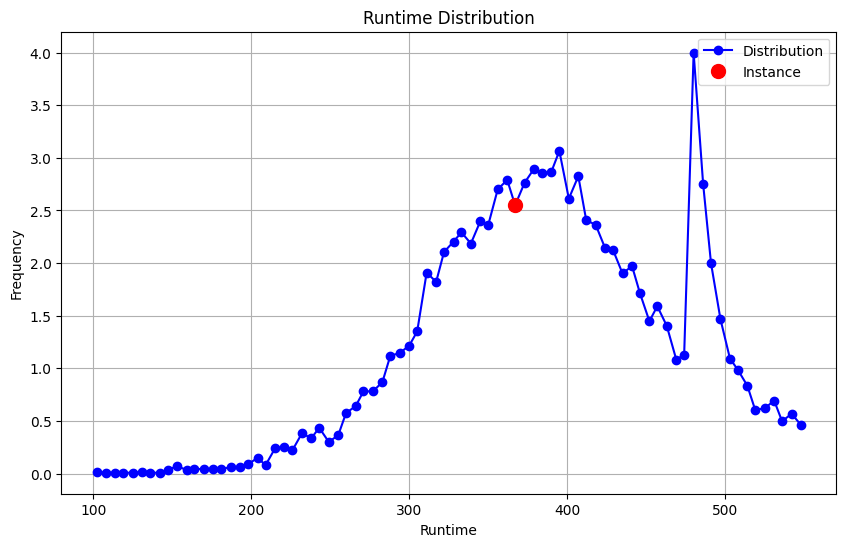

In [16]:
point = (int(row['runtime'].iloc[0]), row['frequency'])
plot_distribution(rt_dist['distribution'], 'Runtime', point)

In [17]:
import numpy as np

In [18]:
# get the nth percentile value of the distribution
def get_nth_percentile(distribution_df, percentile, metric):
    data = np.array(distribution_df[metric])
    return np.percentile(data, percentile)

# check if an instance of the distribution falls into the nth percentile
def is_within_nth_percentile(nth_percentile, instance):
    return instance <= nth_percentile

In [19]:
get_nth_percentile(dist_df, 25, 'runtime')

np.float64(213.5)

# Constructing the dataset

In [37]:
json_dataset = []

# Iterate over the 'train' split
for row in ds["train"]:
    # Runtime solutions
    runtime_efficient_codes = []
    runtime_inefficient_codes = []
    runtime_moderate_codes = []

    # Memory solutions
    memory_efficient_codes = []
    memory_inefficient_codes = []
    memory_moderate_codes = []

    # Get both runtime and memory distribution for the current problem
    runtime_distribution = to_pandas_df(json.loads(row['runtimeDistribution'])['distribution'], 'runtime')
    memory_distribution = to_pandas_df(json.loads(row['memoryDistribution'])['distribution'], 'memory')

    # Obtain the 25th and 75th percentile 
    runtime_twenty_fifth_percentile = get_nth_percentile(runtime_distribution, 25, 'runtime')
    runtime_seventy_fifth_percentile = get_nth_percentile(runtime_distribution, 75, 'runtime')

    for rt_item in row['rt_list']:
        # runtime of the current solution
        runtime = int(rt_item['runtime'])

        if runtime <= runtime_twenty_fifth_percentile:
            runtime_efficient_codes.append(rt_item)
        elif runtime >= runtime_seventy_fifth_percentile:
            runtime_inefficient_codes.append(rt_item)
        else:
            runtime_moderate_codes.append(rt_item)


    # Obtain the 75th percentile for both runtime and memory distribution
    memory_twenty_fifth_percentile = get_nth_percentile(memory_distribution, 25, 'memory')
    memory_seventy_fifth_percentile = get_nth_percentile(memory_distribution, 75, 'memory')

    # Applying the same concept as the above, but for memory efficent code
    for mm_item in row['mm_list']:
        # memory of the current solution
        memory = int(mm_item['memory'])

        if memory <= memory_twenty_fifth_percentile:
            memory_efficient_codes.append(mm_item)
        elif memory >= memory_seventy_fifth_percentile:
            memory_inefficient_codes.append(mm_item)
        else:
            memory_moderate_codes.append(mm_item)

    # Adding the test cases for the problem
    test_cases = [json.loads(obj) for obj in row['test_case'].strip().split('\n') if obj]

    json_data = {
        'question_id': row['question_id'],
        'name': row['name'],
        'prompt': row['content'],
        'difficulty': row['difficulty'],
        'topics': row['topics'],
        'runtime_inefficient_codes': runtime_inefficient_codes,
        'runtime_moderate_codes': runtime_moderate_codes,
        'runtime_efficient_codes': runtime_efficient_codes,
        'memory_inefficient_codes': memory_inefficient_codes,
        'memory_moderate_codes': memory_moderate_codes,
        'memory_efficient_codes': memory_efficient_codes,
        'test_cases': test_cases
    }

    json_dataset.append(json_data)


In [38]:
with open('dataset.json', 'w') as json_file:
    json.dump(json_dataset, json_file, indent=4)

HARISH PRE-PROCESSING TC's

In [39]:
pd.DataFrame(json_dataset).head()

,question_id,name,prompt,difficulty,topics,runtime_inefficient_codes,runtime_moderate_codes,runtime_efficient_codes,memory_inefficient_codes,memory_moderate_codes,memory_efficient_codes,test_cases
0,131,palindrome-partitioning,"<p>Given a string <code>s</code>, partition <c...",Medium,"[string, dynamic-programming, backtracking]",[{'code': 'class Solution: def partition(s...,[{'code': 'class Solution: def partition(s...,"[{'code': 'def is_palindrome(s, l, r): whi...",[{'code': 'class Solution: def partition(s...,[{'code': 'class Solution: def partition(s...,[{'code': 'from collections.abc import Generat...,"[{'input': 'xpbpmgnkxz', 'output': '[['x', 'p'..."
1,132,palindrome-partitioning-ii,"<p>Given a string <code>s</code>, partition <c...",Hard,"[string, dynamic-programming]",[{'code': 'class Solution: def minCut(self...,[{'code': 'class Solution: def minCut(self...,[{'code': 'class Solution: def minCut(self...,[{'code': 'class Solution: def minCut(self...,[{'code': 'class Solution: def minCut(self...,[{'code': 'class Solution: def minCut(self...,"[{'input': '{""s"": ""xmdstsmte""}', 'output': '6'..."
2,135,candy,<p>There are <code>n</code> children standing ...,Hard,"[array, greedy]","[{'code': 'class Solution: def candy(self,...","[{'code': 'class Solution: def candy(self,...","[{'code': 'class Solution: def candy(self,...",[{'code': 'class Solution: # Function to c...,"[{'code': 'class Solution: def candy(self,...",[],"[{'input': '{'ratings': [1, 2, 2]}', 'output':..."
3,137,single-number-ii,<p>Given an integer array <code>nums</code> wh...,Medium,"[array, bit-manipulation]",[{'code': 'class Solution: def singleNumbe...,[{'code': 'class Solution: def singleNumbe...,[{'code': 'class Solution: def singleNumbe...,[{'code': 'class Solution: def singleNumbe...,[{'code': 'class Solution: def singleNumbe...,[{'code': 'class Solution: def singleNumbe...,"[{'input': '[2, 2, 2, 3, 4, 4, 4, 5, 5, 5, 6]'..."
4,138,copy-list-with-random-pointer,<p>A linked list of length <code>n</code> is g...,Medium,"[hash-table, linked-list]","[{'code': '"""""" # Definition for a Node. class ...","[{'code': '"""""" # Definition for a Node. class ...","[{'code': '"""""" # Definition for a Node. class ...","[{'code': '"""""" # Definition for a Node. class ...","[{'code': '"""""" # Definition for a Node. class ...",[],"[{'input': '[{'val': 7, 'random_index': None},..."


In [59]:
print(f"Length of samples: ", len(diverse_sample_df))
# Display the first few rows of the resulting DataFrame
display((diverse_sample_df['topics'].value_counts()))

Length of samples:  200


topics
[array, depth-first-search, breadth-first-search, union-find, matrix]                                     8
[array, binary-search, divide-and-conquer, binary-indexed-tree, segment-tree, merge-sort, ordered-set]    4
[array, dynamic-programming, backtracking, bit-manipulation, bitmask]                                     3
[array, dynamic-programming, stack, greedy, monotonic-stack]                                              3
[array, breadth-first-search, graph, heap-priority-queue, matrix, shortest-path]                          3
                                                                                                         ..
[array, hash-table, math, matrix, counting, enumeration, number-theory]                                   1
[array, hash-table, two-pointers, sorting, enumeration]                                                   1
[array, binary-search, greedy, sorting, prefix-sum]                                                       1
[array, hash-table, m